In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
# %matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv(r"C:\Users\shuva\Downloads\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type','society','availability'],axis =1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [9]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\shuva\AppData\Local\Temp\ipykernel_17640\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [12]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [18]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
# feature engineering

In [20]:
df4 =df3.copy()
df4['price_per_sqft'] = df4['price'] * 100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [21]:
len(df4.location.unique())

1265

In [22]:
df4.loaction = df4.location.apply(lambda x:x.strip())
location_stats= df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

C:\Users\shuva\AppData\Local\Temp\ipykernel_17640\1125901237.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.loaction = df4.location.apply(lambda x:x.strip())


location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [23]:
len(location_stats[location_stats <= 10])

1028

In [24]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Kalkere                  10
Dairy Circle             10
Nagappa Reddy Layout     10
Ganga Nagar              10
1st Block Koramangala    10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1028, dtype: int64

In [25]:
len(df4.location.unique())

1265

In [26]:
df4.location = df4.location.apply(lambda x: 'other'  if x in location_stats_less_than_10 else x)
len(df4.location.unique())

238

## removeable of outlier

Q. what is the typical sqft per bedrooms

In [27]:
df4[df4.total_sqft/df4.bhk <300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [28]:
# we have to remove this anomaly
df5 = df4[~(df4.total_sqft/df4.bhk <300)]
df5.shape

(12055, 8)

In [29]:
# check statistics
df5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.mean(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(11611, 8)

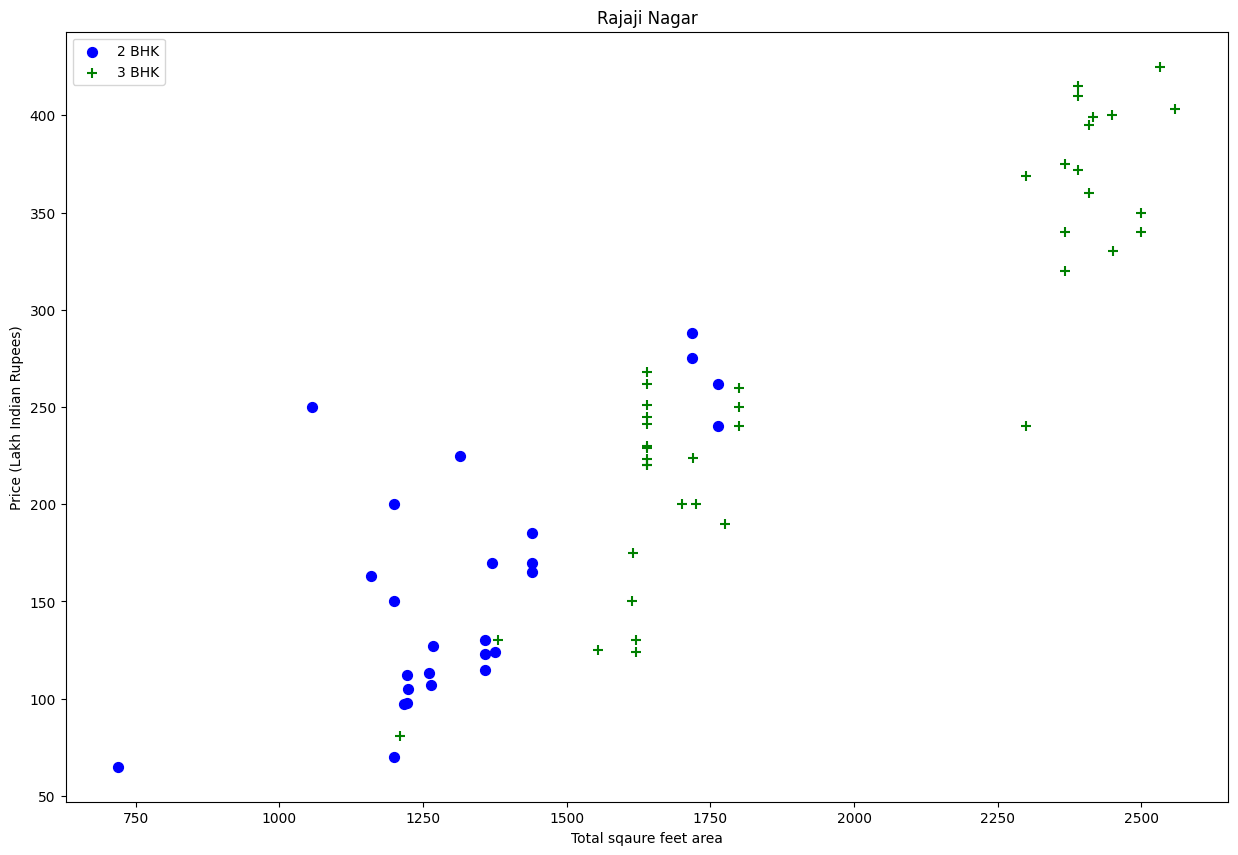

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label ='2 BHK',s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'green',marker ='+',label ='3 BHK', s =50)
    plt.xlabel("Total sqaure feet area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df6,"Rajaji Nagar")

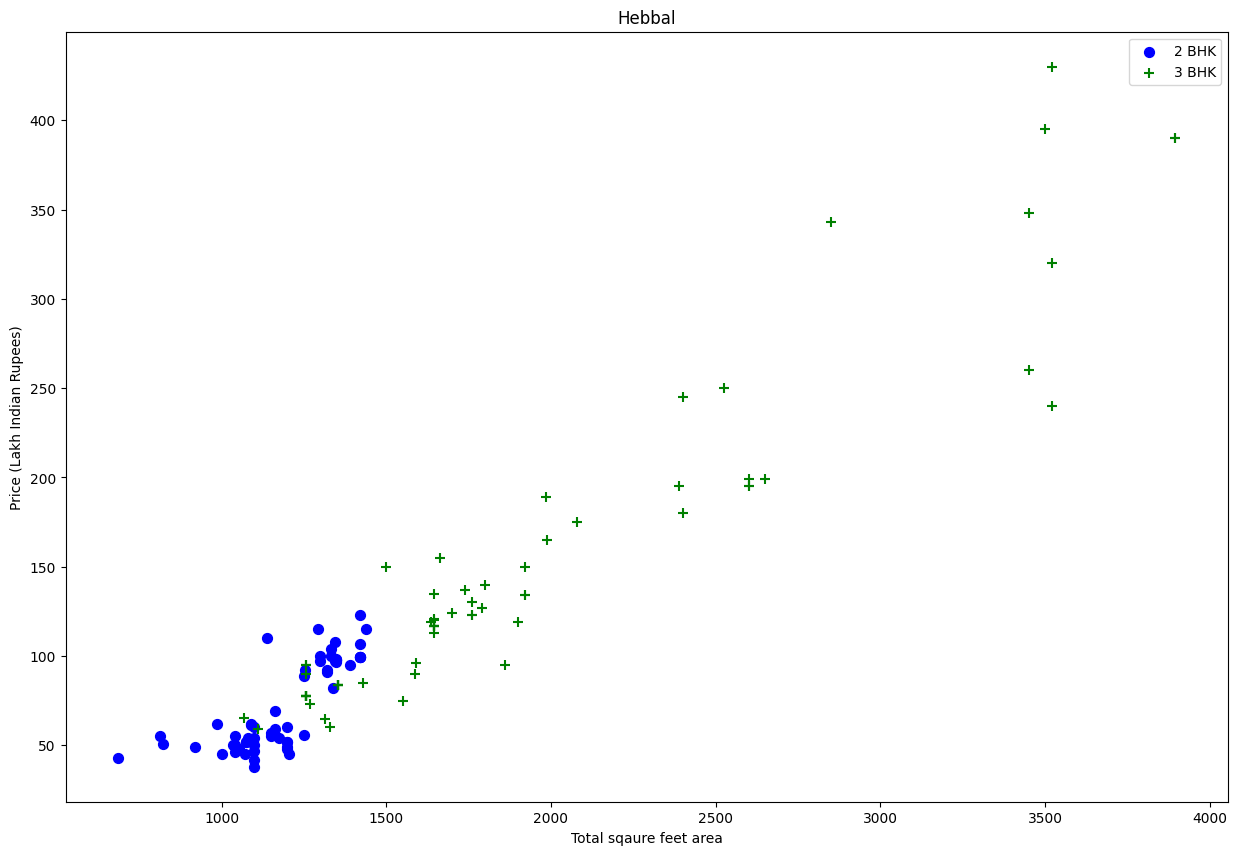

In [32]:
plot_scatter_chart(df6,"Hebbal")


In [33]:
# remove outliers
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] >5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis ='index')

df7 = remove_bhk_outlier(df6)
df7.shape

(8349, 8)

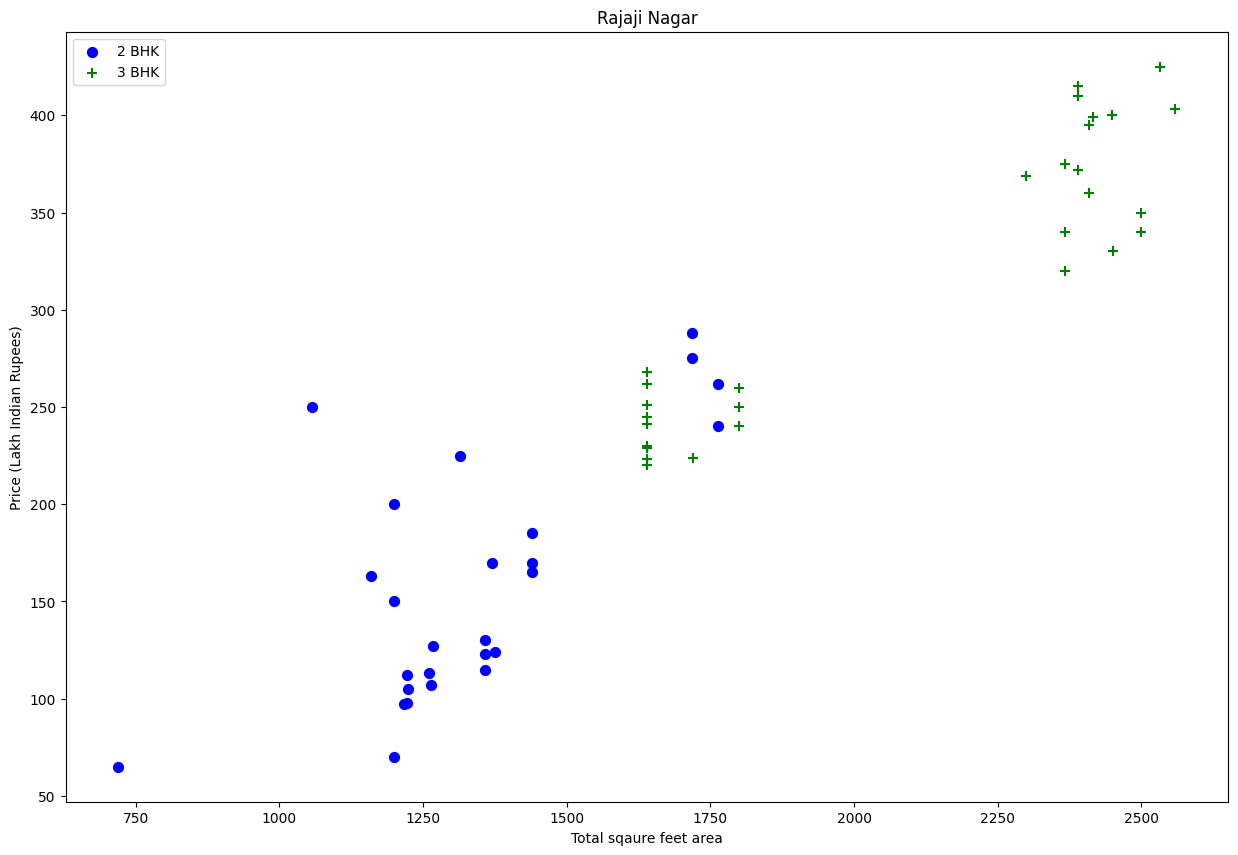

In [34]:
plot_scatter_chart(df7,"Rajaji Nagar")

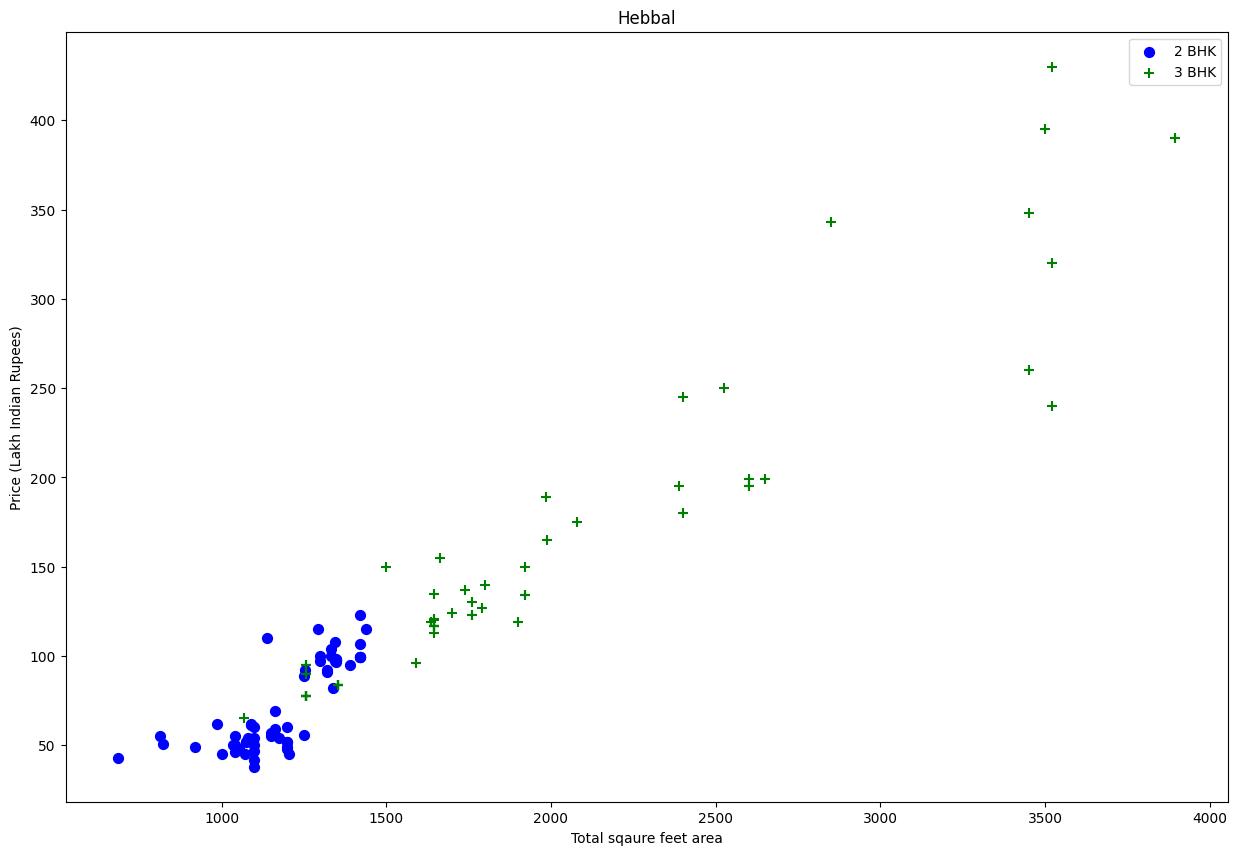

In [35]:
plot_scatter_chart(df7,"Hebbal")

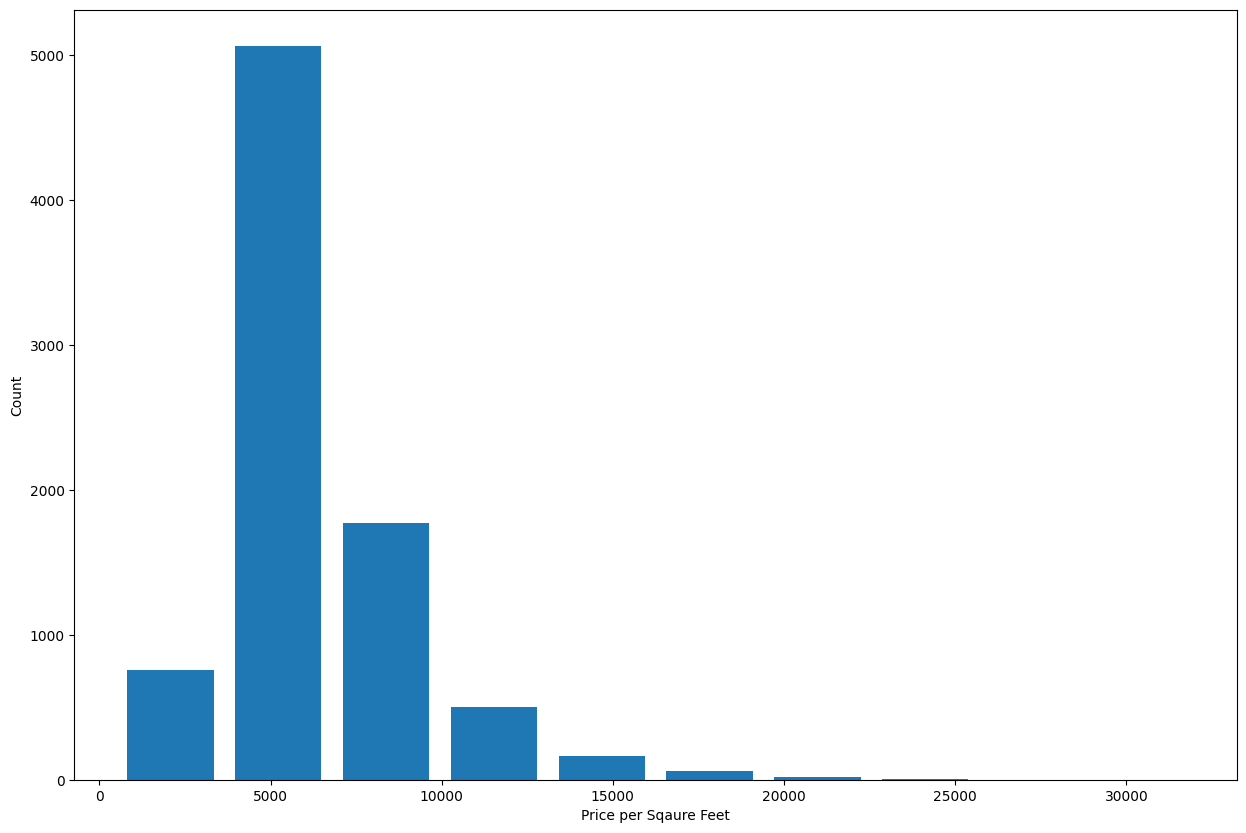

In [36]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Sqaure Feet")
plt.ylabel("Count")
plt.show()

## Outlier Remvoal using bathroom feature


In [37]:
df7.bath.unique()

array([ 2.,  3.,  4.,  7.,  1.,  8.,  5.,  6.,  9., 10., 13.])

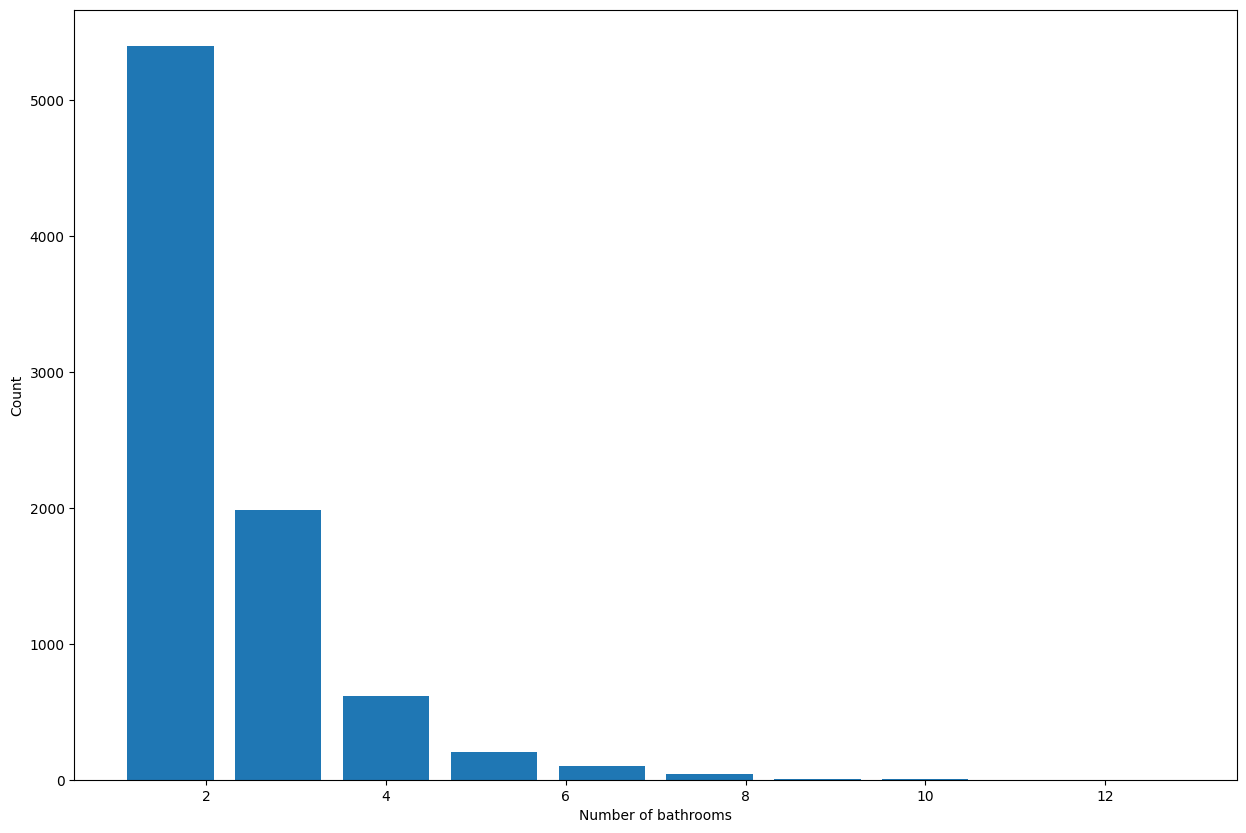

In [38]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [39]:
df7[df7.bath >10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
11021,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [40]:
df7[df7.bath > df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1889,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6788,Rajaji Nagar,5 BHK,7500.0,8.0,3.0,1700.0,5,22666.666667
7986,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
9813,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [41]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(8254, 8)

### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [42]:
df8.head(2)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667


In [43]:
df9 = df8.drop(['size','balcony','price_per_sqft'],axis =1)
df9.head(2)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


## one hot encoding for location

In [45]:
dummies = pd.get_dummies(df9,columns=['location'],dtype=int,prefix='',prefix_sep = '')
dummies.head(3)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10 = pd.concat([df9,dummies.drop('other',axis =1)],axis =1)
df10.head(3)

,location,total_sqft,bath,price,bhk,total_sqft,bath,price,bhk,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1250.0,2.0,40.0,2,1,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1200.0,2.0,83.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1170.0,2.0,40.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df11 = df10.drop('location',axis =1)
df11.head()

,total_sqft,bath,price,bhk,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1250.0,2.0,40.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1200.0,2.0,83.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1170.0,2.0,40.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1425.0,2.0,65.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,947.0,2.0,43.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11.shape

(8254, 245)

In [49]:
X = df11.drop('price',axis =1)
X.head()

,total_sqft,bath,bhk,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1250.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1200.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1170.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1425.0,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,947.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

## train -test

In [53]:
from sklearn.model_selection import train_test_split


In [56]:
# If X is a DataFrame and y is a Series
print(X.index)
print(y.index)


Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       11590, 11592, 11593, 11595, 11597, 11601, 11603, 11604, 11607, 11608],
      dtype='int64', length=8254)
RangeIndex(start=0, stop=13320, step=1)


In [57]:
# Option 1: Align them based on common index
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Option 2: Reset both (only if order matches)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [58]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [60]:
lr_clf.score(X_test,y_test)

-0.02739142360652491

## use K fold cross validation to meause accuracy of LINEARREGRESSION model

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [62]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([-0.04197132, -0.02395077, -0.03715714, -0.0411857 , -0.04219102])

## Find best model using GridsearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [69]:
def find_best_model_using_gridseachcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score =False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(score,columns = ['model','best_score','best_params'])

find_best_model_using_gridseachcv(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,-0.037291,{'fit_intercept': True}
1,lasso,-0.000725,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,-0.859831,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## TEST the model for few properties

In [70]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] =1

    return  lr_clf.predict([x])[0]
    

In [71]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.87827103302698

In [72]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.6459086526356

In [73]:
predict_price('Indira Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.90503938315163

In [74]:
predict_price('Indira Nagar',1000, 3, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.67267700276027

## Export the tested model to a pickle file

In [75]:
import pickle
with open('banglore_home_price_model.pickel','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [79]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))